In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)

lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
#Import dependencies
from citipy import citipy
import requests
from config import api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | biak
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | honiara
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | ulaanbaatar
Processing Record 12 of Set 1 | caarapo
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | asau
Processing Record 17 of Set 1 | liku
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | longyearbyen
Processing Record 23 of Set 1 | star

Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | toba
Processing Record 43 of Set 4 | khoy
Processing Record 44 of Set 4 | belaya gora
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | myitkyina
Processing Record 47 of Set 4 | lahat
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 50 of Set 4 | los llanos de aridane
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | taupo
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | drovyanaya
Processing Record 5 of Set 5 | christchurch
Processing Record 6 of Set 5 | nsanje
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | marcona
City not found. Skipping...
Processing Record 9 of Set 5 | barranca
Processing Record 10 of Set 5 | yangambi
Processing Record 11 of Set 5 | megion
Processing Record 12 of Set 5 | nelson bay
Processing Record 

Processing Record 30 of Set 8 | novoaleksandrovsk
Processing Record 31 of Set 8 | narsaq
Processing Record 32 of Set 8 | aksarka
Processing Record 33 of Set 8 | kitaibaraki
Processing Record 34 of Set 8 | bull savanna
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | pemangkat
Processing Record 37 of Set 8 | todos santos
Processing Record 38 of Set 8 | honningsvag
Processing Record 39 of Set 8 | victoria
Processing Record 40 of Set 8 | mananjary
Processing Record 41 of Set 8 | acari
Processing Record 42 of Set 8 | coquimbo
Processing Record 43 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 44 of Set 8 | eldikan
City not found. Skipping...
Processing Record 45 of Set 8 | dwarka
Processing Record 46 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 47 of Set 8 | mahenge
Processing Record 48 of Set 8 | san miguel
Processing Record 49 of Set 8 | campagna
Processing Record 50 of Set 8 | alegrete
Processing Record 1 of Set 9 | sanger

Processing Record 19 of Set 12 | nova olimpia
Processing Record 20 of Set 12 | goderich
Processing Record 21 of Set 12 | haines junction
Processing Record 22 of Set 12 | toliary
City not found. Skipping...
Processing Record 23 of Set 12 | ilave
Processing Record 24 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 12 | coihaique
Processing Record 26 of Set 12 | treinta y tres
Processing Record 27 of Set 12 | salvador
Processing Record 28 of Set 12 | hovd
Processing Record 29 of Set 12 | hambantota
Processing Record 30 of Set 12 | awjilah
Processing Record 31 of Set 12 | magadan
Processing Record 32 of Set 12 | tucuma
Processing Record 33 of Set 12 | biltine
Processing Record 34 of Set 12 | tazovskiy
Processing Record 35 of Set 12 | anadyr
Processing Record 36 of Set 12 | maine-soroa
Processing Record 37 of Set 12 | izumo
Processing Record 38 of Set 12 | weymouth
Processing Record 39 of Set 12 | acarau
Processing Record 40 of Set 12 | santa maria
Processing 

In [7]:
len(city_data)

580

In [8]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,72.09,84,75,5.01,AR,2021-12-20 21:18:16
1,Biak,-0.9131,122.8766,76.78,80,100,3.89,ID,2021-12-20 21:18:16
2,Punta Arenas,-53.1500,-70.9167,55.51,54,75,29.93,CL,2021-12-20 21:18:17
3,Jamestown,42.0970,-79.2353,39.02,55,1,5.01,US,2021-12-20 21:17:16
4,Avarua,-21.2078,-159.7750,82.45,69,20,10.36,CK,2021-12-20 21:18:17
5,Honiara,-9.4333,159.9500,81.90,81,95,1.48,SB,2021-12-20 21:18:18
6,Barrow,71.2906,-156.7887,12.22,79,90,35.68,US,2021-12-20 21:18:18
7,Cabo San Lucas,22.8909,-109.9124,79.52,50,75,3.00,MX,2021-12-20 21:15:04
8,Aklavik,68.2191,-135.0107,12.20,85,90,5.75,CA,2021-12-20 21:18:19
9,Vaini,-21.2000,-175.2000,82.56,89,75,11.50,TO,2021-12-20 21:18:19


In [9]:
# Convert the array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,72.09,84,75,5.01,AR,2021-12-20 21:18:16
1,Biak,-0.9131,122.8766,76.78,80,100,3.89,ID,2021-12-20 21:18:16
2,Punta Arenas,-53.1500,-70.9167,55.51,54,75,29.93,CL,2021-12-20 21:18:17
3,Jamestown,42.0970,-79.2353,39.02,55,1,5.01,US,2021-12-20 21:17:16
4,Avarua,-21.2078,-159.7750,82.45,69,20,10.36,CK,2021-12-20 21:18:17
5,Honiara,-9.4333,159.9500,81.90,81,95,1.48,SB,2021-12-20 21:18:18
6,Barrow,71.2906,-156.7887,12.22,79,90,35.68,US,2021-12-20 21:18:18
7,Cabo San Lucas,22.8909,-109.9124,79.52,50,75,3.00,MX,2021-12-20 21:15:04
8,Aklavik,68.2191,-135.0107,12.20,85,90,5.75,CA,2021-12-20 21:18:19
9,Vaini,-21.2000,-175.2000,82.56,89,75,11.50,TO,2021-12-20 21:18:19


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-12-20 21:18:16,-38.0023,-57.5575,72.09,84,75,5.01
1,Biak,ID,2021-12-20 21:18:16,-0.9131,122.8766,76.78,80,100,3.89
2,Punta Arenas,CL,2021-12-20 21:18:17,-53.1500,-70.9167,55.51,54,75,29.93
3,Jamestown,US,2021-12-20 21:17:16,42.0970,-79.2353,39.02,55,1,5.01
4,Avarua,CK,2021-12-20 21:18:17,-21.2078,-159.7750,82.45,69,20,10.36


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

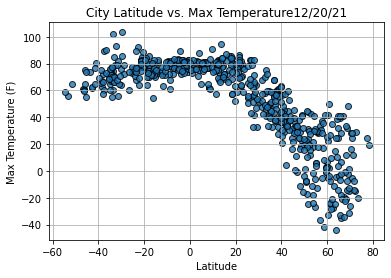

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs ma. temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphs properties 
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

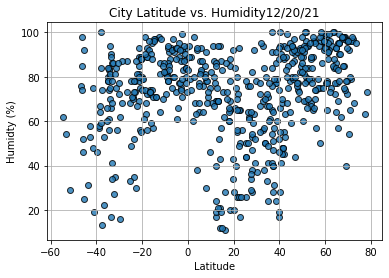

In [14]:
# Build the scatter plots for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidty (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

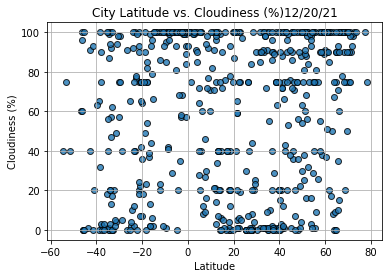

In [15]:
# Build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show the plot
plt.show

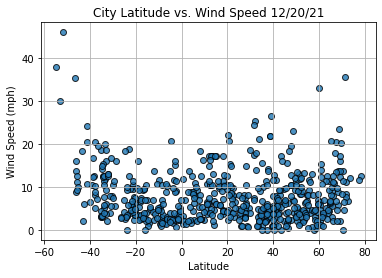

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
index13= city_data_df.loc[13]
index13

City                 Saint-Pierre
Country                        RE
Date          2021-12-20 21:18:20
Lat                      -21.3393
Lng                       55.4781
Max Temp                    77.58
Humidity                       81
Cloudiness                     90
Wind Speed                   5.75
Name: 13, dtype: object

In [58]:
city_data_df["Lat"] >= 1

0      False
1      False
2      False
3       True
4      False
       ...  
575     True
576    False
577     True
578     True
579    False
Name: Lat, Length: 580, dtype: bool

In [59]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jamestown,US,2021-12-20 21:17:16,42.0970,-79.2353,39.02,55,1,5.01
6,Barrow,US,2021-12-20 21:18:18,71.2906,-156.7887,12.22,79,90,35.68
7,Cabo San Lucas,MX,2021-12-20 21:15:04,22.8909,-109.9124,79.52,50,75,3.00
8,Aklavik,CA,2021-12-20 21:18:19,68.2191,-135.0107,12.20,85,90,5.75
10,Ulaanbaatar,MN,2021-12-20 21:18:20,47.9077,106.8832,-11.07,77,0,2.24


In [60]:
# Creating northern and southern hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

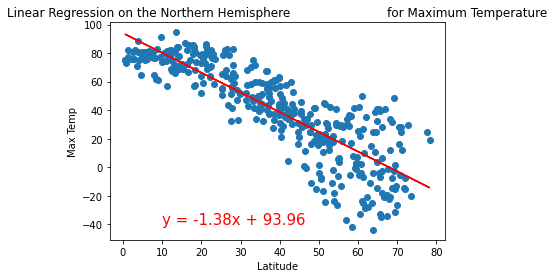

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

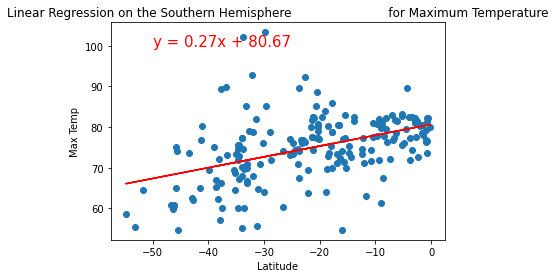

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))

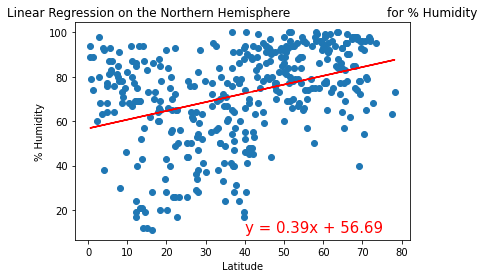

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

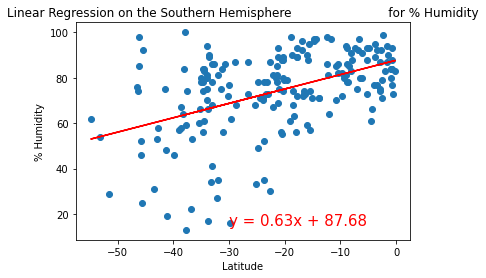

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity','% Humidity',(-30,15))

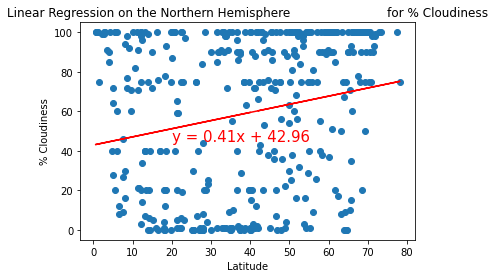

In [76]:
# Linear regression on the northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,45))

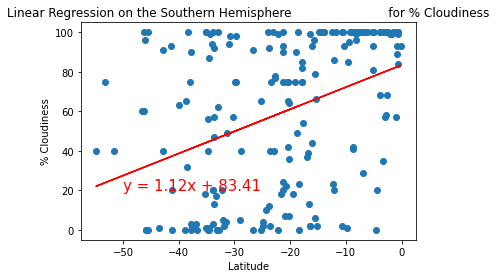

In [78]:
# Linear regression on the southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

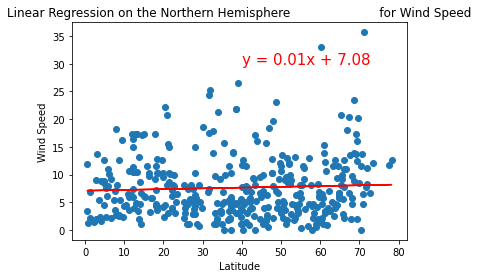

In [80]:
# Linear regression on the northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Calll the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (40,30))

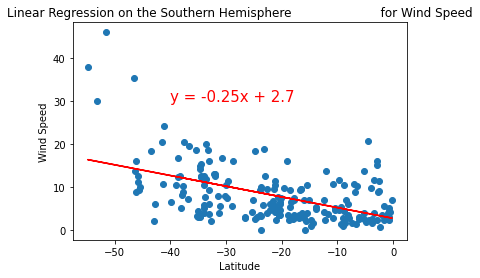

In [82]:
# Linear regression on the southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Calll the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed', (-40,30))